In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 2.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Rajasthan1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,0,0,0,0,0,0,-18,14.736618,985.312622,8.545349,109.345042,0
131396,2014,12,31,20,0,0,0,0,0,0,0,-18,13.804154,986.000549,8.901171,122.334315,0
131397,2014,12,31,21,0,0,0,0,0,0,0,-18,12.933973,986.018555,9.348792,135.562509,0
131398,2014,12,31,22,0,0,0,0,0,0,0,-18,12.142112,985.832092,9.821783,148.928152,0


In [5]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Snow Depth,Date
0,2000,1,1,0,0,0,0,0,0,0,0,-4,13.811437,982.749817,27.447862,174.755997,0,2000-01-01 00:00:00
1,2000,1,1,1,0,0,0,0,0,0,0,-4,13.117300,982.670105,29.048857,169.544205,0,2000-01-01 01:00:00
2,2000,1,1,2,0,0,0,0,0,0,0,-4,12.433960,982.404175,31.216659,156.340938,0,2000-01-01 02:00:00
3,2000,1,1,3,0,0,0,0,0,0,0,-3,11.797632,982.555298,34.956075,142.945864,0,2000-01-01 03:00:00
4,2000,1,1,4,0,0,0,0,0,0,0,-1,11.195487,982.558106,41.177540,129.625767,0,2000-01-01 04:00:00
5,2000,1,1,5,0,0,0,0,0,0,0,-11,11.136730,984.379272,19.563755,116.428208,0,2000-01-01 05:00:00
6,2000,1,1,6,0,0,0,0,0,0,0,-10,10.646979,985.168579,21.357848,103.583783,0,2000-01-01 06:00:00
7,2000,1,1,7,0,0,0,0,0,0,0,-9,11.265209,985.925598,22.168916,91.181648,0,2000-01-01 07:00:00
8,2000,1,1,8,0,78,306,135,74,354,139,-8,14.277325,986.486450,20.120814,79.450627,0,2000-01-01 08:00:00
9,2000,1,1,9,0,114,597,331,121,600,339,-6,17.677278,986.856323,18.365240,68.755938,0,2000-01-01 09:00:00


In [6]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [7]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,420.4
2000-01-02,418.5
2000-01-03,423.3
2000-01-04,421.2
2000-01-05,418.1
...,...
2014-12-27,392.9
2014-12-28,398.0
2014-12-29,394.4


In [8]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,420.585714
2000-01-14,412.871429
2000-01-21,441.300000
2000-01-28,467.642857
2000-02-04,464.128571
...,...
2014-12-05,421.871429
2014-12-12,410.628571
2014-12-19,386.057143


In [9]:
y_w[:'2011']

,GHI
Date,
2000-01-07,420.585714
2000-01-14,412.871429
2000-01-21,441.300000
2000-01-28,467.642857
2000-02-04,464.128571
...,...
2011-12-02,402.771429
2011-12-09,410.542857
2011-12-16,398.057143


In [10]:
y[:4382]

,GHI
Date,
2000-01-01,420.4
2000-01-02,418.5
2000-01-03,423.3
2000-01-04,421.2
2000-01-05,418.1
...,...
2011-12-29,406.8
2011-12-30,406.8
2011-12-31,406.7


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
type(y)

pandas.core.frame.DataFrame

In [13]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [14]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [15]:
X_T[:626]

array([[420.4, 418.5, 423.3, ..., 418.1, 426.4, 416.2],
       [411.5, 370.4, 411.5, ..., 401.6, 437.7, 424.1],
       [432. , 434. , 439.6, ..., 444.6, 446.5, 449.3],
       ...,
       [399.8, 396.9, 397.9, ..., 401.5, 398.4, 401.6],
       [407.6, 401.4, 400.6, ..., 382.3, 402.1, 405.6],
       [407.9, 408.3, 406.8, ..., 406.7, 405.8, 405.5]])

In [16]:
Y_T[:626].shape

(626,)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

X_T=X_T.reshape(X_T.shape[0],X_T.shape[1],1)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(7,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7,1))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[407.3819]]
[[416.4627]]
[[433.94452]]
[[419.47458]]
[[468.14603]]
[[487.34326]]
[[514.8609]]
[[557.0004]]
[[557.7735]]
[[565.74524]]
[[603.04236]]
[[621.90515]]
[[624.4358]]
[[624.18524]]
[[631.75073]]
[[598.2344]]
[[657.0236]]
[[676.1986]]
[[694.4305]]
[[688.91534]]
[[705.12885]]
[[694.54474]]
[[664.47363]]
[[646.20074]]
[[691.60425]]
[[683.3029]]
[[639.0192]]
[[508.63202]]
[[630.64594]]
[[618.63745]]
[[623.7096]]
[[546.5154]]
[[517.64557]]
[[521.7357]]
[[575.72174]]
[[431.19684]]
[[503.5118]]
[[606.774]]
[[601.3135]]
[[581.7347]]
[[565.4084]]
[[531.47894]]
[[507.92065]]
[[494.5252]]
[[472.66324]]
[[448.97855]]
[[428.45648]]
[[414.2947]]
[[408.7251]]
[[368.88705]]
[[405.50107]]
[[410.64148]]
[[405.27908]]
[[426.24323]]
[[418.70444]]
[[464.7218]]
[[437.19577]]
[[478.34158]]
[[501.42215]]
[[552.61066]]
[[570.4539]]
[[595.81854]]
[[615.5407]]
[[619.11975]]
[[606.89966]]
[[651.80414]]
[[651.58984]]
[[645.4309]]
[[637.93695]]
[[683.1065]]
[[667.04315]]
[[697.1382]]
[[708.02704]]
[[709.37

[array([[407.3819]], dtype=float32),
 array([[416.4627]], dtype=float32),
 array([[433.94452]], dtype=float32),
 array([[419.47458]], dtype=float32),
 array([[468.14603]], dtype=float32),
 array([[487.34326]], dtype=float32),
 array([[514.8609]], dtype=float32),
 array([[557.0004]], dtype=float32),
 array([[557.7735]], dtype=float32),
 array([[565.74524]], dtype=float32),
 array([[603.04236]], dtype=float32),
 array([[621.90515]], dtype=float32),
 array([[624.4358]], dtype=float32),
 array([[624.18524]], dtype=float32),
 array([[631.75073]], dtype=float32),
 array([[598.2344]], dtype=float32),
 array([[657.0236]], dtype=float32),
 array([[676.1986]], dtype=float32),
 array([[694.4305]], dtype=float32),
 array([[688.91534]], dtype=float32),
 array([[705.12885]], dtype=float32),
 array([[694.54474]], dtype=float32),
 array([[664.47363]], dtype=float32),
 array([[646.20074]], dtype=float32),
 array([[691.60425]], dtype=float32),
 array([[683.3029]], dtype=float32),
 array([[639.0192]], dt

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

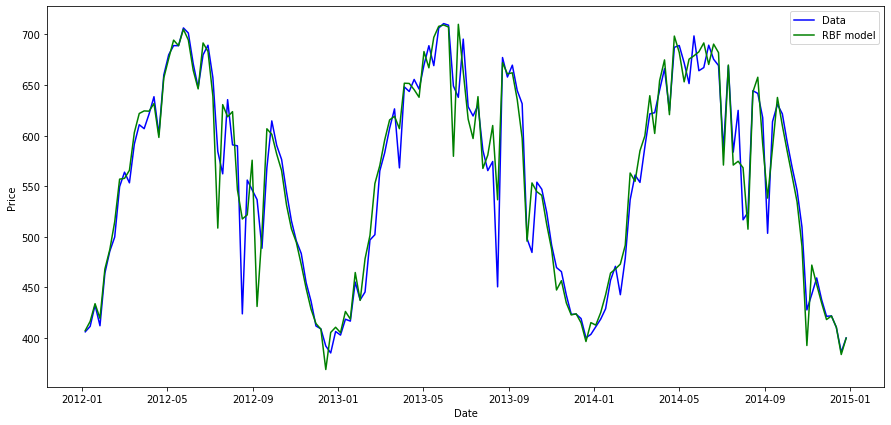

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
df1 = pd.DataFrame(columns=['Date','GHI'])
df1['Date'] = y_w[626:-1].index
df1['GHI'] = np.asarray(yhat).reshape(156,)
df1.to_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Rajasthan1/LSTMweekly.csv')

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False)

23.425792897353677

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,))

0.0286434578404627